# Enunciado

Utilizando o dataset do Spotify construa um modelo sequencial ou funcional no Keras para
fazer a classificação desse dataset.

## Dicas:
 - Tente calibrar a quantidade de camadas e neurônios a fim de atingir uma acurácia superior a 74%;
 - Tente utilizar ó dropout a fim de evitar eventual overfitting.
 - Aplique os pré-processamentos necessários.
 - Apresente a evolução do conjunto de treino e validação.
 - Apresente a acurácia do conjunto de testes.
 - Apresente a configuração (estrutura) da rede neural.

In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, AveragePooling1D, BatchNormalization, Activation, GlobalMaxPooling1D
import matplotlib.pyplot as plt
from sklearn import preprocessing
from keras import optimizers
import seaborn as sns

np.random.seed(0)

In [3]:
data = pd.read_csv("../data/spotify.csv")

In [4]:
print(data.shape)
data

(2017, 17)


,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe()

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                2017 non-null   int64  
 1   acousticness      2017 non-null   float64
 2   danceability      2017 non-null   float64
 3   duration_ms       2017 non-null   int64  
 4   energy            2017 non-null   float64
 5   instrumentalness  2017 non-null   float64
 6   key               2017 non-null   int64  
 7   liveness          2017 non-null   float64
 8   loudness          2017 non-null   float64
 9   mode              2017 non-null   int64  
 10  speechiness       2017 non-null   float64
 11  tempo             2017 non-null   float64
 12  time_signature    2017 non-null   float64
 13  valence           2017 non-null   float64
 14  target            2017 non-null   int64  
 15  song_title        2017 non-null   object 
 16  artist            2017 non-null   object 


### **Checking unique values in categorical variables**

In [8]:
num_data = data._get_numeric_data().columns.tolist()
cat_data = set(data.columns) - set(num_data)

print(num_data, cat_data)

['id', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence', 'target'] {'song_title', 'artist'}


In [9]:
#checking categorical data
for i in cat_data:
    print(data[i].value_counts())

River                 3
Jack                  3
Mask Off              2
Be My Baby            2
Oblivion              2
                     ..
L'Amour Parfait       1
I Follow Rivers       1
From Nowhere          1
I Need You            1
I Wanna Get Better    1
Name: song_title, Length: 1956, dtype: int64
Drake                16
Rick Ross            13
Disclosure           12
WALK THE MOON        10
Backstreet Boys      10
                     ..
Real Connoisseur      1
Deep Purple           1
Brenton Wood          1
Ultimate Painting     1
Bleachers             1
Name: artist, Length: 1343, dtype: int64


### **Adding features**

In [10]:
data['danceXacousti']= data['acousticness'] * data['danceability']

In [11]:
data['partysong'] = data['loudness'] + data['tempo'] + (data['energy']*100) + (data['danceability']*100)

### **Correlation**

In [12]:
corr = data.corr()
corr_rank = corr["target"].sort_values(ascending = False)
corr_rank

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21680\4156345147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


target              1.000000
danceability        0.176706
speechiness         0.154006
instrumentalness    0.152594
duration_ms         0.146749
valence             0.107930
partysong           0.105754
time_signature      0.040182
energy              0.039688
tempo               0.034732
key                 0.033594
liveness            0.026364
loudness           -0.072000
mode               -0.072336
danceXacousti      -0.092505
acousticness       -0.129627
id                 -0.865969
Name: target, dtype: float64

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21680\3084959253.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr()


<AxesSubplot:title={'center':'Correlation of every feature'}>

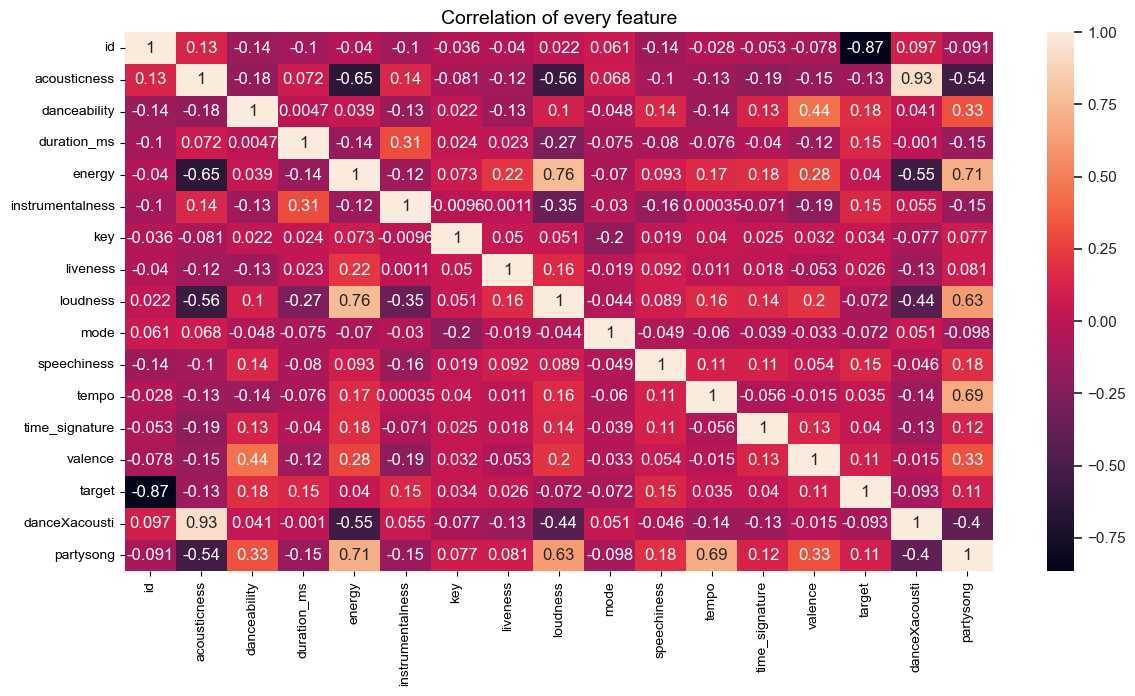

In [13]:
plt.figure(figsize=(14, 7))
plt.title('Correlation of every feature', fontsize=14)
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True)

### **Checking Outliers**

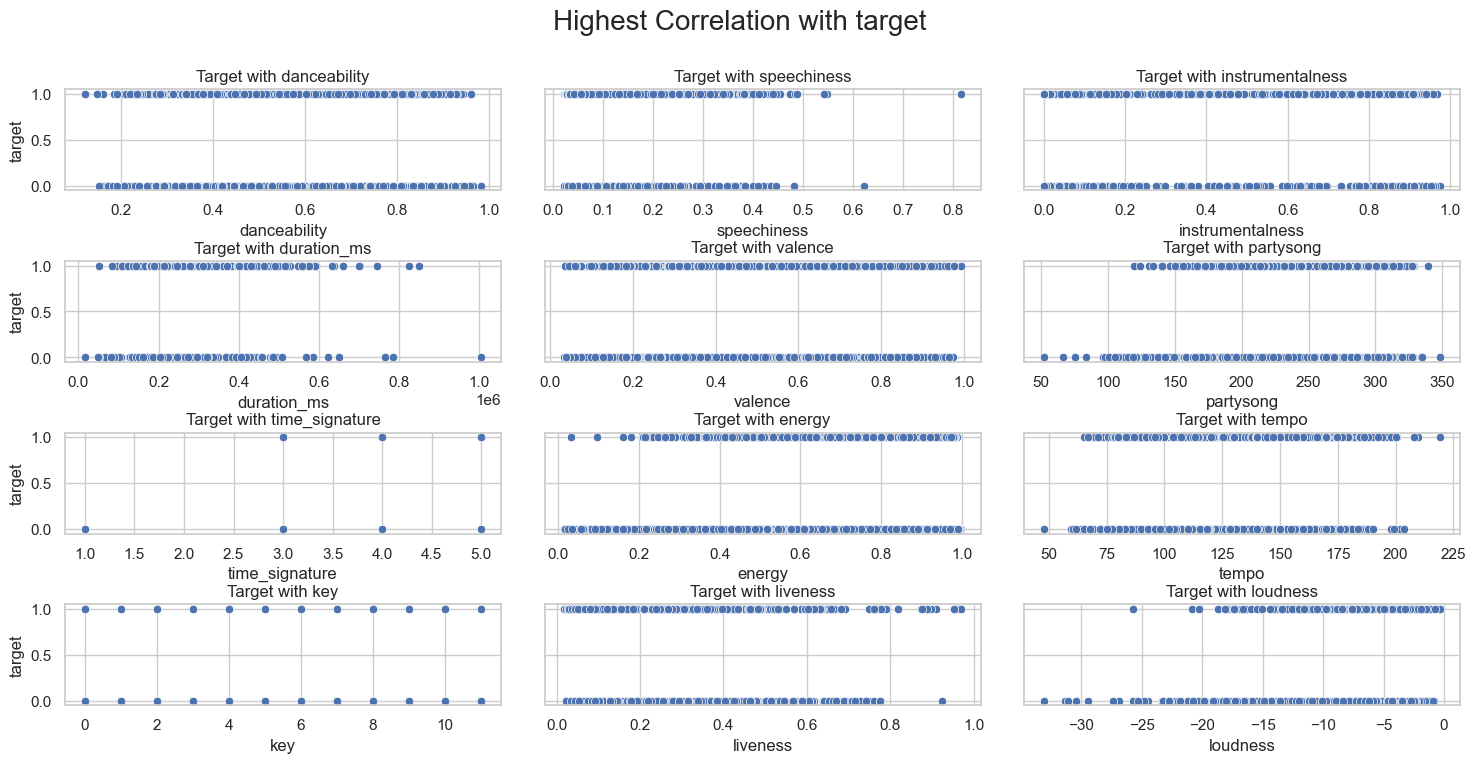

In [14]:
#scatter plot of the highest correlation with sale price

corr_rank = corr_rank.drop(["target"])
sort_corr = corr_rank.index.tolist()
fig, axes = plt.subplots(4, 3, figsize=(18,8), sharey= True)
fig.suptitle("Highest Correlation with target", fontsize= 20)
plt.subplots_adjust(hspace = 0.7, wspace=0.1)
for i,col in zip(range(12), sort_corr):
    sns.scatterplot(y=data['target'], x=data[col],ax=axes[i//3][i%3])
    axes[i//3][i%3].set_title('Target with '+col)

In [15]:
outliers = data[["speechiness","duration_ms"]]

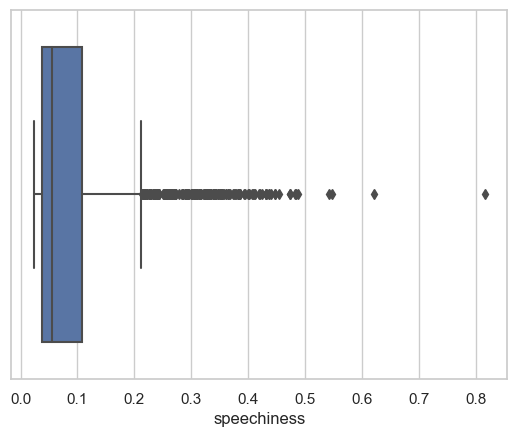

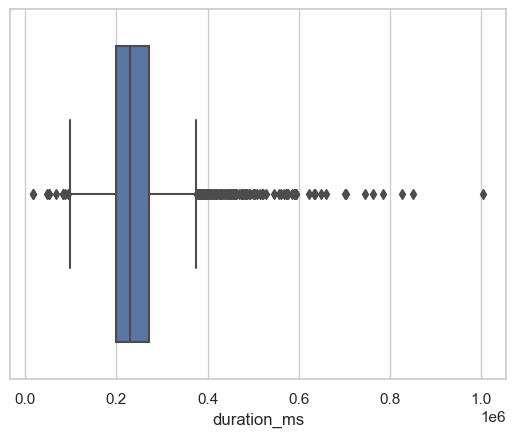

In [16]:
for i in outliers:
    sns.boxplot(x=outliers[i])
    plt.show()

In [17]:
print(data['time_signature'].value_counts())

4.0    1891
3.0      93
5.0      32
1.0       1
Name: time_signature, dtype: int64


In [18]:
data = data.drop(data[(data['time_signature'] == 1.0)].index)

In [19]:
# Function to remove outliers

def rm_outliers(data):
    df1 = data.copy()
    data = data[["speechiness","duration_ms"]]
    # q1 = the first quartile | q3 = the third quartile | q2 = interquartile distance
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    
    q2 = q3 - q1
    # setting the areas = lower and upper bounds equals the median times 1.5
    lower_bound = q1 - (1.5 * q2)
    upper_bound = q3 + (1.5 * q2)
    
    for col in data.columns:
        # if the data in each column that has outliers were below the lower bound then it will set it to the lower bound area. Same with upper bound.
        for i in range(0, len(data[col])):
            if data[col][i] < lower_bound[col]:
                data[col][i] = lower_bound[col]
                
            if data[col][i] > upper_bound[col]:
                data[col][i] = upper_bound[col]
                
    for col in data.columns:
        df1[col] = data[col]
        
    return(df1)

In [20]:
# Applying the function to the outliers
try:
    outliers = rm_outliers(outliers)
    data = rm_outliers(data)
except Exception:
    pass

C:\Users\Usuario\AppData\Local\Temp\ipykernel_21680\2571899162.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound[col]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21680\2571899162.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = lower_bound[col]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_21680\2571899162.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col][i] = upper_bound[

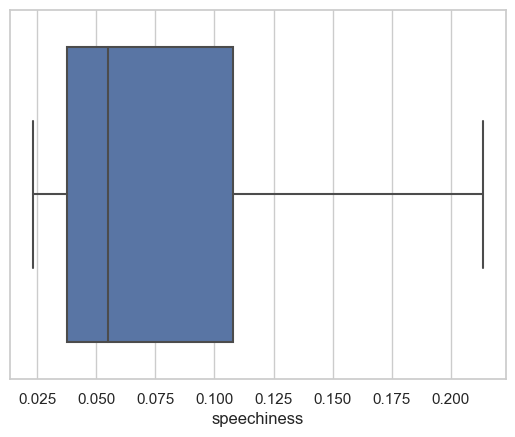

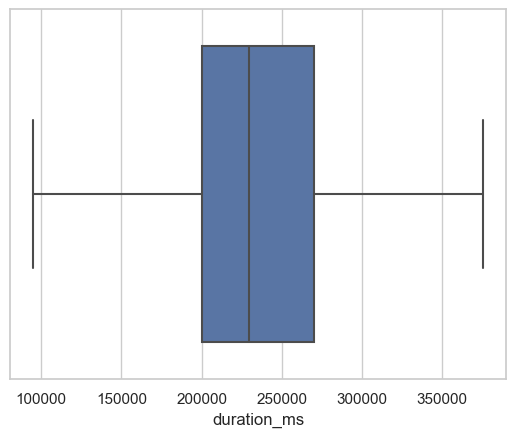

In [21]:
# Seeing if the outliers were indeed removed

for i in outliers:
    sns.boxplot(x=outliers[i])
    plt.show()

### **Model**

In [22]:
X = data.drop(["target", "song_title", "artist", "id"], axis=1)

min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X_normalized = pd.DataFrame(np_scaled, columns = X.columns)

y = data["target"]
x_train, x_test, y_train, y_test = train_test_split(X_normalized.values, y.values, test_size=0.1, random_state=5)

In [23]:
len(x_train), len(x_test)

(1814, 202)

In [24]:
percent = 0.1
amount = int(len(x_train)*percent)
(final_x, x_valid) = x_train[amount:], x_train[:amount]
(final_y, y_valid) = y_train[amount:], y_train[:amount]

In [25]:
model = Sequential()
model.add(Dense(64, input_dim=final_x.shape[1], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [26]:
opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'], run_eagerly=True)

In [27]:
result = model.fit(final_x, final_y, epochs=25, batch_size=18, validation_data=(x_valid, y_valid), verbose=1, shuffle=False, use_multiprocessing=True)

Epoch 1/25
91/91 [==============================] - 1s 14ms/step - loss: 0.6891 - accuracy: 0.5291 - val_loss: 0.6870 - val_accuracy: 0.5138
Epoch 2/25
91/91 [==============================] - 1s 13ms/step - loss: 0.6763 - accuracy: 0.5744 - val_loss: 0.6589 - val_accuracy: 0.5470
Epoch 3/25
91/91 [==============================] - 1s 13ms/step - loss: 0.6517 - accuracy: 0.6265 - val_loss: 0.6207 - val_accuracy: 0.6464
Epoch 4/25
91/91 [==============================] - 1s 13ms/step - loss: 0.6270 - accuracy: 0.6375 - val_loss: 0.6288 - val_accuracy: 0.6354
Epoch 5/25
91/91 [==============================] - 1s 12ms/step - loss: 0.6202 - accuracy: 0.6699 - val_loss: 0.6053 - val_accuracy: 0.6740
Epoch 6/25
91/91 [==============================] - 1s 12ms/step - loss: 0.6169 - accuracy: 0.6607 - val_loss: 0.5978 - val_accuracy: 0.6906
Epoch 7/25
91/91 [==============================] - 1s 13ms/step - loss: 0.6042 - accuracy: 0.6846 - val_loss: 0.5832 - val_accuracy: 0.7182
Epoch 8/25
91

In [28]:
score = model.evaluate(x_test, y_test, batch_size=18)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

12/12 [==============================] - 0s 5ms/step - loss: 0.5318 - accuracy: 0.7723
Test loss:  0.5317640900611877
Test accuracy:  0.7722772359848022


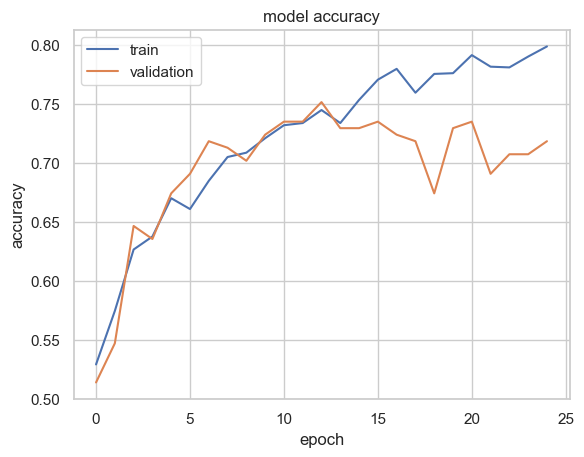

In [29]:
plt.figure(1)
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [30]:
plot_model(model, to_file='spotify.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [31]:
#testing
data = pd.read_csv("../data/spotify.csv")
data.drop(["target", "song_title", "artist", "id"], axis=1, inplace=True)
data.columns

d = preprocessing.normalize(data)
data = pd.DataFrame(d, columns=['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'])